# Smart City - Population Prediction
In this module, we shall build, test and deploy Machine Learning models to predict the population through Regression Analysis and other AI techniques

In [31]:
#importing the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from prophet import Prophet
from datetime import datetime, timedelta
#To ignore the warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
#importing the dataset from a csv file into a python pandas dataframe
data = pd.read_csv(r"D:\AISSMS IOIT - AI&DS (628299510)\General\Hackathons\Prasunethon\Extra\City_Profile_data.csv")

In [3]:
data

,Ward Name,Ward No.,Total Population (in thousands),Population - Male (in thousands),Population - female (in thousands)
0,Dhanori,1.0,44060.0,23099.0,20961.0
1,Vidhyanagar Lohagaon,2.0,25430.0,13125.0,12305.0
2,Tingre Pumping Station,3.0,22592.0,11528.0,11064.0
3,Kalas Vishrantwadi,4.0,24678.0,12830.0,11848.0
4,Nanasaheb Parulekar Vidhyalaya,5.0,18490.0,9378.0,9112.0
...,...,...,...,...,...
174,Bhilarewadi,175.0,2694.0,1447.0,1247.0
175,Gujar Nimbalkarwadi,176.0,1384.0,719.0,665.0
176,Jambhulwadi,177.0,972.0,523.0,449.0
177,Kolewadi,178.0,456.0,236.0,220.0


# Feature Engineering

In [7]:
X = data[['Ward No.', 'Total Population (in thousands)', 'Population - Male (in thousands)', 
          'Population - female (in thousands)']]
y = data['Total Population (in thousands)']

# Train Test Split

In [8]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Model Building

In [9]:
model = LinearRegression()

In [10]:
model.fit(X_train, y_train)

LinearRegression()

In [11]:
y_pred = model.predict(X_test)

# Model Evaluation

In [14]:
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae:.2f}')

Mean Absolute Error (MAE): 0.00


In [15]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse:.2f}')

Mean Squared Error (MSE): 0.00


In [16]:
r2 = r2_score(y_test, y_pred)
print(f'R-squared (R2): {r2:.2f}')

R-squared (R2): 1.00


In [17]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Coefficients: [-1.60945735e-14  6.66666667e-01  3.33333333e-01  3.33333333e-01]
Intercept: -7.275957614183426e-12


In [34]:
accuracy_score = model.score(X_test, y_test) * 100
accuracy_score

100.0

# Line of Best Fit

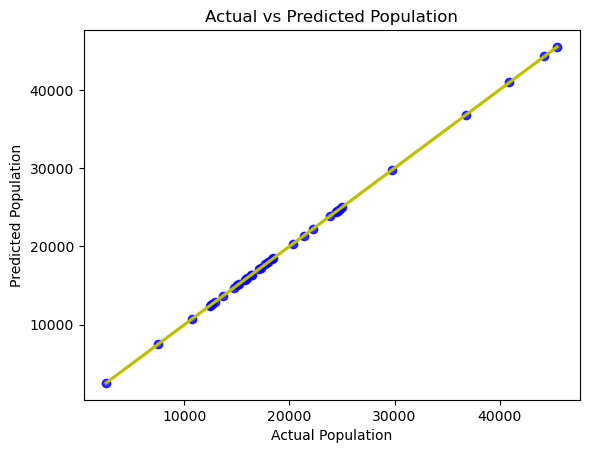

In [22]:
sns.regplot(x = y_test, y = y_pred, line_kws = dict(color = "y"), scatter_kws = dict(color = "blue"))
plt.xlabel("Actual Population")
plt.ylabel("Predicted Population")
plt.title("Actual vs Predicted Population")
plt.show()

## Adding dates to predict future values

In [32]:
start_date = datetime.now().date()
date_range = [start_date + timedelta(days=i) for i in range(179)]
date_data = data.copy()
date_data['Date'] = date_range
date_data

,Ward Name,Ward No.,Total Population (in thousands),Population - Male (in thousands),Population - female (in thousands),Date
0,Dhanori,1.0,44060.0,23099.0,20961.0,2024-06-30
1,Vidhyanagar Lohagaon,2.0,25430.0,13125.0,12305.0,2024-07-01
2,Tingre Pumping Station,3.0,22592.0,11528.0,11064.0,2024-07-02
3,Kalas Vishrantwadi,4.0,24678.0,12830.0,11848.0,2024-07-03
4,Nanasaheb Parulekar Vidhyalaya,5.0,18490.0,9378.0,9112.0,2024-07-04
...,...,...,...,...,...,...
174,Bhilarewadi,175.0,2694.0,1447.0,1247.0,2024-12-21
175,Gujar Nimbalkarwadi,176.0,1384.0,719.0,665.0,2024-12-22
176,Jambhulwadi,177.0,972.0,523.0,449.0,2024-12-23
177,Kolewadi,178.0,456.0,236.0,220.0,2024-12-24


# Predictions using Prophet Model

20:19:56 - cmdstanpy - INFO - Chain [1] start processing
20:19:56 - cmdstanpy - INFO - Chain [1] done processing


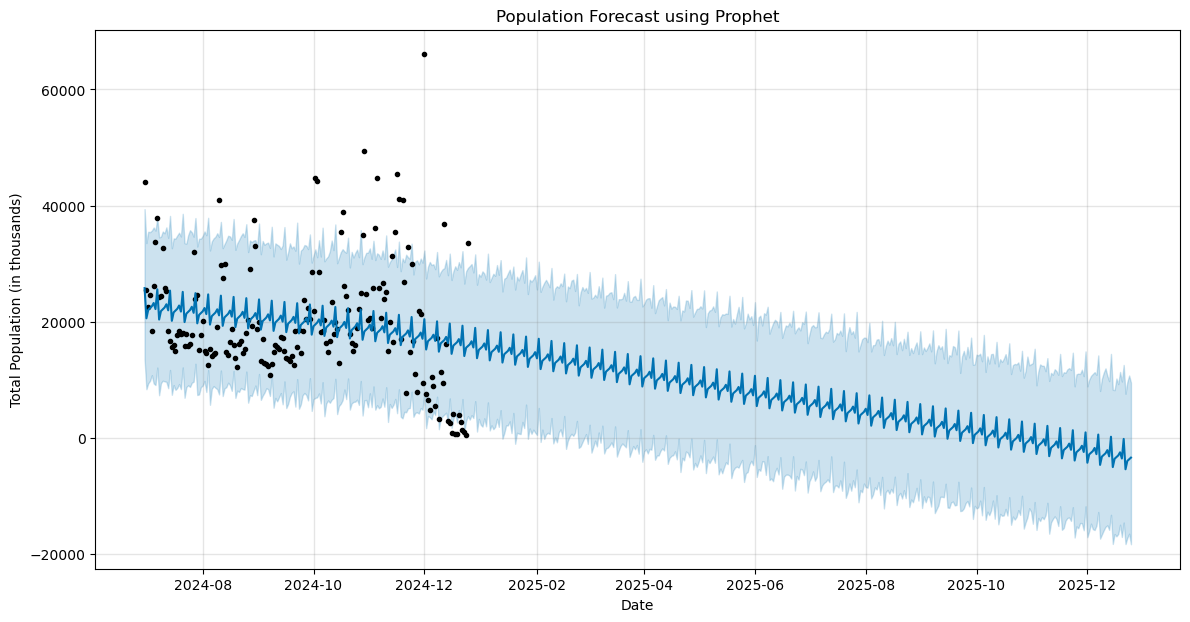

In [33]:
model_ = Prophet()
model_.fit(date_data.rename(columns={'Date': 'ds', 'Total Population (in thousands)': 'y'}, inplace = False))
future = model_.make_future_dataframe(periods=365)
forecast = model_.predict(future)

fig, ax = plt.subplots(figsize=(14, 7))
model_.plot(forecast, ax=ax)
plt.title('Population Forecast using Prophet')
plt.xlabel('Date')
plt.ylabel('Total Population (in thousands)')
plt.grid(True)
plt.show()

In [37]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2024-06-30,25797.587683,13537.515336,39387.065874
1,2024-07-01,20596.357833,8388.388892,33542.799071
2,2024-07-02,22051.333419,9396.990828,35493.168302
3,2024-07-03,22352.623527,9835.803447,35433.066393
4,2024-07-04,22665.600336,10802.965400,35702.492474
...,...,...,...,...
539,2025-12-21,-170.109848,-14566.647984,12565.357993
540,2025-12-22,-5393.918679,-18278.215020,7603.880353
541,2025-12-23,-3961.522073,-17217.691255,9641.726290
542,2025-12-24,-3682.810945,-16495.683291,10741.410425


# Thank You!!!